In [23]:
#importing all the required modules
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [24]:
data = yf.download("^GSPC", start="2015-01-01", end="2022-10-16")
df = pd.DataFrame(data)
df.to_csv("sp500_data.csv")

[*********************100%***********************]  1 of 1 completed


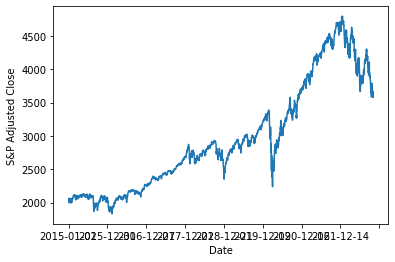

In [47]:
#plotting the data
stock_df = pd.read_csv("sp500_data.csv")
stock_df.set_index("Date", inplace=True)
stock_df['Adj Close'].plot()
plt.ylabel("S&P Adjusted Close")
plt.show()

In [33]:
#pre-processing
df = pd.read_csv("sp500_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [34]:
#feature selection
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

In [36]:
#dividing into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=0)

In [37]:
#scaling the features
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [44]:
#applying the model
model = RandomForestRegressor(n_estimators=400, random_state=15, min_samples_split=3, min_samples_leaf=1, max_depth=8, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[1860.98248291 2162.79928153 2680.08547141 2162.79928153 3507.27318359
 3006.72000122 4123.33984375 3573.80292938 2714.53500366 2580.85455877
 2063.81090199 1897.03273315 2875.58429827 2786.3669058  2020.2188992
 2249.57666016 3381.9300293  2036.32777235 2063.81090199 3857.71270955
 3006.72000122 2595.02280971 2339.11336263 2112.60963723 2595.02280971
 2477.20700684 2468.79334852 4350.73331706 2292.82006836 2573.38613094
 4641.65991211 4112.58007812 2002.61669922 3486.00500488 2440.7550293
 2702.56776259 4576.57666016 2624.41333008 3081.30200073 1978.56665039
 2100.9661578  1880.66398926 2082.16115159 2611.07501221 2112.60963723
 1899.49499512 3900.25146484 2702.56776259 3611.62899536 2203.76745605
 3855.39360352 2468.79334852 3722.60264374 2184.9211713  2842.51101074
 2261.22667101 3825.40001085 2747.13909357 4075.43994141 3870.02048869
 4297.93001302 2151.1199707  3152.91557068 2184.9211713  4146.17597656
 1860.98248291 3936.6925354  3250.00750732 2736.1814488  2432.08098145
 3055.86

In [45]:
#performance evaluation
print("MAE (Mean Absolute Error):", round(metrics.mean_absolute_error(y_test, predict), 4))
print("MSE (Mean Squared Error):", round(metrics.mean_squared_error(y_test, predict), 4))
print("RMSE (Root Mean Squared Error):", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

MAE (Mean Absolute Error): 3.4761
MSE (Mean Squared Error): 21.9699
RMSE (Root Mean Squared Error): 4.6872
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.88 %.
